# Stacked Auto Encoder
---
                                                                  written by Yang, Soyoung
                                                                           2017.07.19 v1.0
                                                                           2017.08.05 v1.1
                                                                           2017.08.09 v1.2

1. import
2. get mnist data
2. widget
3. tensorflow : graphing
    1. pre-training, classifier
    2. fine-tuning
4. tensorflow : tf.Session().run
5. plot result

---

## Stacked AE

reference:

About AE
- [VAE explained](http://kvfrans.com/variational-autoencoders-explained/)
- [AE explanation by Hugo Larochelle](https://www.youtube.com/watch?v=FzS3tMl4Nsc)
- [How to Generate Images - Intro to Deep Learning 14](https://www.youtube.com/watch?v=3-UDwk1U77s)

About functinos
- [ReLU in SungKim lecture note](http://pythonkim.tistory.com/40)
- [softmax in Udacity deep-learning](https://www.youtube.com/watch?v=G8eNWzxOgqE&index=7&list=PLAwxTw4SYaPn_OWPFT9ulXLuQrImzHfOV)
- [cross entropy in Udacity deep_learning](https://www.youtube.com/watch?v=tRsSi_sqXjI&index=9&list=PLAwxTw4SYaPn_OWPFT9ulXLuQrImzHfOV)
- [Entropy, KLD](http://blog.naver.com/PostView.nhn?blogId=atelierjpro&logNo=220981354861)
<br>


### 1. Auto Encoder
- Auto Encoder은 RBM(Restricted Boltzmann Machine)의 개념을 응용한 알고리즘으로, RBM을 통해 부분적으로 Weight를 트레이닝(pre-training)시킨 다음에 전체를 돌려(fine-tuning) ANN을 훈련시키는 뉴럴넷이다.

<img src="./imgs/ae_cat.png" style="width: 1000px;">
- 인풋에 encoder Weight를 곱한 결과값 latent variable에 다시 decoder Weight를 곱하여, 그 결과값이 인풋과 비슷하게 하도록 한다. 인코딩과 디코딩 과정을 길게하여 각각의 레이어를 형성하면 위의 이미지와 같은 구조를 갖게 된다. 


- Stacked Auto Encoder는 단순히 xavier initializer로 초기값을 정하지 않는다. 각각의 레이어에서 인풋 데이터를 잘 보존하도록 Weight를 트레이닝 시킨 뒤에, 이 Weight를 초기값으로 설정한다. 마구잡이로 초기값을 설정했을 때 보다 정확도가 좋은데, 개인적으로 해봤을 때는 정확도가 0.96인 상태에서 전체 트레이닝(fine-tuning)을 시작했다.
- 최근에는 latent variable을 구할때 샘플들의 특징, 분포(ex.gaussian distribution)를 고려하는 VAE(variational auto encoder)을 사용한다. 이는 조금 더 복잡하므로, 위의 'VAE explained' 링크를 확인해보길 바란다.
- 여기서는 mnist 이미지들을 적절히 분류하는 기본적인 stacked auto encoder를 구현한다. 이미지 분별기(image classifier)을 기준으로 설명한다.
<img src="./imgs/ae_denoising.png" style="width: 700px;">
<br>
- Auto Encoder는 이미지의 노이즈를 없애는 데 자주 사용된다.

#### 1) pre-training
<img src="./imgs/ae_X.jpeg" style="width: 500px;">
<img src="./imgs/ae_pre.jpeg" style="width: 500px;">

- 인풋 X에 encoder Weight1를 곱한다. 결과값 latent variable H1 에 다시 decoder Weight1를 곱해 X\_, X예측값을 구한다. 
- X와 X\_의 차이를 계산하여 Weight를 업데이트 한다. 
- decoder Weight와 X\_를 버리고, 마찬가지 방법으로 H1을 인풋으로 하여 encoder Weight2를 업데이트 한다.

#### 2) classifier
<img src="./imgs/ae_classifier.jpeg" style="width: 500px;">
- pre-training의 마지막 output layer에서는 인코딩 디코딩을 하지 않는다. Hidden layer의 결과값을 output Weight에 곱하여 logit을 구한다(logit은 아무란 함수도 입히지 않은 결과값 그 자체를 의미한다). logit에 softmax 펑션을 걸어서 결과값을 구한다. cross entropy 를 이용하여 결과값과 실제 라벨(타겟값)의 에러를 구하고 output weight를 업데이트한다.

#### 3) fine-tuning
- pre-training와 classifier 단계를 통해 부분적으로 모든 weight의 트레이닝을 끝내면 전체를 트레이닝하는 fine-tuning을 시작한다.
- 일반적인 ANN을 트레이닝 시키는 것과 같다.


<br>
<br>

### 2. 여러 응용 함수들 : ReLU, softmax, one-hot-encoding, cross entropy

#### 1) ReLU
<img src="./imgs/nn_relu.png" style="width: 500px;">
<img src="./imgs/relu.png" style="width: 500px;">
<br>
- 지금까지 activation function을 linear model인 sigmoid function을 썼다. 하지만 더 강력한 함수가 나타났는데, non-linear function인  ReLU function 이다.
- 위의 이미지는 기본적인 ReLU function, ```relu(x) = max(0,x)```로 굉장히 간단하다. 음수에 대해서만 0으로 처리한다.
<br>

<img src="./imgs/act_func_cifar10.png" style="width: 500px;">

- 이외에도 다양한 활성화 함수들이 있다. cifar-10 이미지 분별기에서 가장 좋은 성능을 내는 것은 maxout이다.
    - Leaky ReLU : ReLU 함수의 변형으로 음수에 대해 1/10로 값을 줄여서 사용하는 함수이다. LeakyReLU = max(0.1x, x)
    - ELU : ReLU를 0이 아닌 다른 값을 기준으로 사용하는 함수이다. [ if x>0, ELU(x) = x else ELU(x) = alpha(exp(x)-1) ]
    - maxout : 두 개의 W와 b 중에서 큰 값이 나온 것을 사용하는 함수이다. maxout = max(W1'\*x + b1, W2'\*x + b2)
<br>
<br>


#### 2) softmax
<img src="./imgs/softmax-layer.png" style="width: 500px;">
<img src="./imgs/softmax.png" style="width: 500px;">

- 숫자들이 적혀있는 벡터가 있을 때 softmax 함수는 한 벡터의 합이 1이 되게 만든다. 즉 각 요소들의 확률을 담은 벡터를 리턴한다.
- DNN을 돌리면 각 레이어의 결과값이 상수일 수도, 무리수일 수도 있다. 따라서 softmax로 각각을 확률값으로 만들어 비교하기 편하게 만든다.
- logit값에 softmax 펑션을 돌려준다. 여기서 logit은 인풋에 weight를 곱하고 bias를 더한 결과값으로, softmax를 하기 전의 값을 의미한다.
<br>
<br>


#### 3) one-hot encoding
<img src="./imgs/one-hot-encode.png" style="width: 500px;">
- one-hot-encoding 은 하나만 1이고 나머지는 모두 0인 벡터를 만든다.
- 단순한 상수 라벨을 벡터로 만들어 준다. classifier에서 클래스를 구분할 때 사용한다. softmax한 결과값이 벡터이므로, 결과값과 타겟값을 비교하기 위해 단순한 상수 라벨을 one-hot-encoding하여 차원을 맞춰준다. 예를 들어, 클래스의 id가 1일때는 [1 0 0]으로, id가 2일때는 [0 1 0]으로 나타낸다. 벡터의 길이는 클래스의 갯수와 동일하다.
<br>
<br>


#### 4) cross entropy cost function
<img src="imgs/cross_entropy.png" style="width: 500px;">
- 여러개의 클래스가 있고, 이 클래스들을 구분하고자 한다. Wx+b 로 구한 결과값(logit)을 한 열의 합이 1이 되는 확률값으로 바꾸고(softmax) 이 확률 예측 값(y\_pred)과 실제 타겟 라벨(y)을 가지고 에러를 계산하는 방법이 cross-entropy이다. 
- logistic regression의 cost = -y\*log(h(x)) - (1-y)\*log((1-h(x)) 와 같다. 두개의 클래스를 구분하는 이 cost function을 여러개의 클래스를 구분할 수 있도록 한 것으로, log을 활용한 logistic cost를 확대한 셈이다.
- cross entropy는 softmax된 모델의 결과값과 one-hot-encoded된 라벨의 거리를 구하여, 예측값과 타겟값의 에러를 계산하는 방법이다.


- entropy = 불확실성, 정보량, 불순도
- Entropy(P, Q) = P * log(Q) : 어느 한쪽의 확률(P or Q)이 확실하면 entropy는 0이 된다. P와 Q는 서로 cross 한다. 이때 P는 타겟 값, Q는 예측 값이라고 할 수 있다. 
- KLD = CrossEntropy(P, Q) - Entropy(P) : KL-divergence. 만약 이 값이 크다면 P와 Q가 많이 퍼져있고 정보량이 많다는 것이고, 값이 0이라면 둘은 완전히 똑같다. 
<br>
<br>


#### 5) ```tf.nn.softmax_cross_entropy_with_logits(logits=zZ, labels=Y)```
<img src="imgs/cross_entropy_model.png" style="width: 500px;">
- 이미지의 S(y)의 S는 softmax이다.
- tensorflow에서 제공하는 ```tf.nn.softmax_cross_entropy_with_logits```는 logit과 label(=Y)를 인풋으로 받아 내부에서 logit 값을 softmax시켜주고, 둘의 cross entropy 값을 리턴한다. 
<br>

---
## 1. import

In [2]:
from __future__ import print_function, division
import os, sys, re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from utils.utils_ann import Utils_ann  
from tensorflow.contrib.tensorboard.plugins import projector  # embedding

## 2. get mnist data

In [3]:
# load dataset, X, Y(one-hot-vector), Y_label(just int)
LOG_DIR = '/Users/yangsoyoung/Desktop/kd2tf/summary/ae_summary_2'

utils = Utils_ann(logdir=LOG_DIR, embed_size=10000)

train_X, train_Y, teX, teY = utils.load_mnist_dataset()

perm_tr = np.random.permutation(len(train_X))
perm_te = np.random.permutation(len(teX))

trX = train_X[perm_tr]
trY = train_Y[perm_tr]

train_data = np.column_stack([trX, trY])
test_data = np.column_stack([teX, teY])

## 3. widget

In [5]:
wg_lr = widgets.FloatSlider(value=0.001, min=0.0001, max=1.0000, step=0.0001,
                            description="learning rate: ", readout=True, readout_format='0.4f')
wg_stack_epoch_size = widgets.IntSlider(value=3, min=2, max=20, step=1,
                                  description="stacking epoch size: ", readout=True)
wg_epoch_size = widgets.IntSlider(value=3, min=3, max=300, step=1,
                                  description="epoch size: ", readout=True)
wg_batch_size = widgets.IntSlider(value=128, min=50, max=500, step=1,
                                  description="mini batch size: ", readout=True)
wg_num_layers = widgets.IntSlider(value=3, min=3, max=11, step=2, description="num of hidden layers: ")
wg_h1_num_nodes = widgets.IntSlider(value=1000, min=700, max=1000, step=100, description="num of nodes in h1: ")
wg_how_many_guess_plot = widgets.IntSlider(value=10, min=5, max=20, step=1, description="test samples to plot: ")

widget_make_init = widgets.ToggleButton(value=False, button_style='success',
                                        description="Initialize Options", disabled=False, icon='check')

def merged_widget_model(lr, stack_epoch, epoch, batch_size, hidden_layers, num_nodes, num_sample_to_plot):
    
    hl_nodes = [None] # record dimension of each hidden layer
    for n in range(1, hidden_layers+1):
        if n <= int(hidden_layers/2) :
            print("hidden layer{} : dimension is {}".format(n, num_nodes))
            hl_nodes.append(num_nodes)
            num_nodes = num_nodes-150
        else :
            print("hidden layer{} : dimension is {}".format(n, num_nodes))
            hl_nodes.append(num_nodes)
            num_nodes = num_nodes+150
    return(lr, stack_epoch, epoch, batch_size, hidden_layers, num_nodes, num_sample_to_plot, hl_nodes)

def merged_widget_init(value):
    if value:
        wg_lr.value=0.001
        wg_stack_epoch_size.value=3
        wg_epoch_size.value = 3
        wg_batch_size.value= 128
        wg_num_layers.value = 3
        wg_h1_num_nodes.value = 1000
        wg_how_many_guess_plot.value=10

merged_widget_model_ann = interactive(merged_widget_model,lr=wg_lr, stack_epoch=wg_stack_epoch_size,
                                      epoch=wg_epoch_size, batch_size=wg_batch_size,
                                      hidden_layers=wg_num_layers, num_nodes=wg_h1_num_nodes, num_sample_to_plot=wg_how_many_guess_plot)

merged_widget_init = interactive(merged_widget_init, value=widget_make_init)

display(merged_widget_model_ann, merged_widget_init)

In [6]:
## get parameters from widgets
lr, stack_epoch_size, epoch_size, batch_size, num_hid_layers, num_nodes, num_test_plot, hl_nodes = merged_widget_model_ann.result
hl_nodes

num_batches_per_epoch = int((len(trX) - 1) / batch_size) + 1

## 4. tf : graph

1. pre-training
    - latent variables 
    - Z is input of each hidden layers 
    - z is output of current layer, and input value of next layer, which will be Z in next layer
    - zZ is like normal neural network. zZ is fully connected through all of previous layers.
2. fine-tuning

In [12]:
graph = tf.Graph()

with graph.as_default():
    ## pre-training ##

    # input layer : start stacking weights
    with tf.name_scope("hidden_layer_0"):
        # placeholder
        X = tf.placeholder(shape=[None, 784], dtype=tf.float32, name='X')

        # encoding
        W_en = tf.Variable(initial_value=utils.xavier_init([784, hl_nodes[1]]), dtype=tf.float32)
        b_en = tf.Variable(initial_value=utils.xavier_init([hl_nodes[1]]), dtype=tf.float32)
        # encoded output
        zZ = tf.nn.relu(tf.add(tf.matmul(X, W_en), b_en), name='zZ')  # after all, zZ is dependent with previous layers
        z = tf.nn.relu(tf.add(tf.matmul(X, W_en), b_en), name='z')    # valuable in this name scope, for stacking
        # decoding
        W_de = tf.Variable(initial_value=utils.xavier_init([hl_nodes[1], 784]), dtype=tf.float32)
        b_de = tf.Variable(initial_value=utils.xavier_init([784]), dtype=tf.float32)
        # decoded output
        X_pred = tf.nn.relu(tf.add(tf.matmul(z, W_de), b_de))

        # loss and optimizer
        loss = tf.reduce_mean(tf.pow(X - X_pred, 2), name='loss')
        optimizer = tf.train.RMSPropOptimizer(learning_rate=lr).minimize(loss, name='opt')

        # summary
        s1 = tf.summary.histogram(values=W_en, name='Weight_en')  # weight of encoder, layer0(=input layer)
        s2 = tf.summary.histogram(values=b_en, name='bias_en')
        s3 = tf.summary.histogram(values=z, name='output')  # output of layer0
        s4 = tf.summary.histogram(values=W_de, name='Weight_de')
        s5 = tf.summary.histogram(values=b_de, name='bias_de')  # bias of decoder, layer0(=input layer)
        s6 = tf.summary.scalar(tensor=loss, name='stacking_loss')  # loss of layer0, while stacking

        summ = tf.summary.merge([s1, s2, s3, s4, s5, s6], name='summ')
        # use tf.summary.merge, to summary variables in specific layer

    # hidden layers : stacking...
    for n in range(1, num_hid_layers):
        with tf.name_scope("hidden_layer_{}".format(n)):
            # input from previous layer
            Z = tf.placeholder(shape=[None, hl_nodes[n]], dtype=tf.float32, name='Z')
            # encoding
            W_en = tf.Variable(initial_value=utils.xavier_init([hl_nodes[n], hl_nodes[n + 1]]), dtype=tf.float32)
            b_en = tf.Variable(initial_value=utils.xavier_init([hl_nodes[n + 1]]), dtype=tf.float32)
            # encoded output
            zZ = tf.nn.relu(tf.add(tf.matmul(zZ, W_en), b_en), name='zZ')  # connected from previous layers
            z = tf.nn.relu(tf.add(tf.matmul(Z, W_en), b_en), name='z')  # valuable within this layer
            # decoding
            W_de = tf.Variable(initial_value=utils.xavier_init([hl_nodes[n + 1], hl_nodes[n]]), dtype=tf.float32)
            b_de = tf.Variable(initial_value=utils.xavier_init([hl_nodes[n]]), dtype=tf.float32)
            # decoded output
            Z_pred = tf.nn.relu(tf.add(tf.matmul(z, W_de), b_de))

            # loss and optimizer
            loss = tf.reduce_mean(tf.pow(Z - Z_pred, 2), name='loss')
            optimizer = tf.train.RMSPropOptimizer(learning_rate=lr).minimize(loss, name='opt')

            # summary
            s1 = tf.summary.histogram(values=W_en, name='Weight_en')    # weight of encoder, layer0(=input layer)
            s2 = tf.summary.histogram(values=b_en, name='bias_en')
            s3 = tf.summary.histogram(values=z, name='output')          # output of layer0
            s4 = tf.summary.histogram(values=W_de, name='Weight_de')
            s5 = tf.summary.histogram(values=b_de, name='bias_de')      # bias of decoder, layer0(=input layer)
            s6 = tf.summary.scalar(tensor=loss, name='stacking_loss')   # loss of layer0, while stacking

            summ = tf.summary.merge([s1, s2, s3, s4, s5, s6], name='summ')

    # output layer : Classifier
    with tf.name_scope("output_layer"):
        # placeholder
        # Z is value of zZ in last hidden layer. independent with previous layers
        Z = tf.placeholder(shape=[None, hl_nodes[-1]], dtype=tf.float32, name='Z')
        Y = tf.placeholder(shape=[None, 10], dtype=tf.float32, name='target')
        # variable
        W = tf.Variable(initial_value=utils.xavier_init([hl_nodes[-1], 10]), dtype=tf.float32)
        b = tf.Variable(initial_value=utils.xavier_init([10]), dtype=tf.float32)

        # output, y_predict of _independent_ output layer
        zZ = tf.add(tf.matmul(zZ, W), b, name="zZ")

        z = tf.add(tf.matmul(Z, W), b, name='output')
        y_pred = tf.nn.softmax(z, name='y_predict')

        # loss & optimizer
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=z, labels=Y), name='loss')
        optimizer = tf.train.AdamOptimizer(lr).minimize(loss, name='opt')

        # summary
        s1 = tf.summary.histogram(values=W_en, name='Weight_output')  # weight of encoder, layer0(=input layer)
        s2 = tf.summary.histogram(values=b_en, name='bias_output')
        s3 = tf.summary.histogram(values=z, name='output')  # output of layer0
        s4 = tf.summary.scalar(tensor=loss, name='stacking_loss_output')  # loss of layer0, while stacking

        summ = tf.summary.merge([s1, s2, s3, s4], name='summ')

    ## fine-tuning training ##
    # run like normal neural net, training through Y value
    with tf.name_scope("fine_tuning_training"):
        # fully connected output. interact zZ finally.
        fine_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=zZ, labels=Y),
                                   name='fine_tuning_loss')
        fine_optimizer = tf.train.AdamOptimizer(lr).minimize(fine_loss, name='fine_tuning_opt')

        # summary loss
        s1 = tf.summary.scalar("fine-tuning_loss", fine_loss)

    with tf.name_scope("accuracy"):
        fc_y_pred = tf.nn.softmax(zZ, name='fc_y_predict')
        predicted_label = tf.argmax(fc_y_pred, axis=1, name="prediction")
        correct = tf.equal(tf.argmax(fc_y_pred, axis=1), tf.argmax(Y, axis=1))
        accuracy_op = tf.reduce_mean(tf.cast(correct, tf.float32))

        # summary accuracy
        s2 = tf.summary.scalar("accuracy", accuracy_op)


    # embedding setup
    embeddings = tf.Variable(initial_value=utils.xavier_init([10000, 10]), name="mnist_embedding")
    embedding_update = tf.assign(ref=embeddings, value=zZ, name="update")

    # variable initializer
    init = tf.global_variables_initializer()

    # writer & saver
    writer = tf.summary.FileWriter(LOG_DIR, graph=graph)
    saver = tf.train.Saver()


    # tensorboard's summaries & embedding
    summ_fine = tf.summary.merge([s1, s2], name='summary_fine')
    summ_merged = tf.summary.merge_all()

    # embedding system to visualize
    config = projector.ProjectorConfig()
    embedding_config = config.embeddings.add()
    embedding_config.tensor_name = embeddings.name
    embedding_config.metadata_path = os.path.join(LOG_DIR, 'metadata.tsv')
    projector.visualize_embeddings(writer, config)

print("Graphing is finished.")

Graphing is finished.


In [10]:
# check name of each nodes
[tensor.name for tensor in graph.as_graph_def().node]

['hidden_layer_0/X',
 'hidden_layer_0/Sqrt/x',
 'hidden_layer_0/Sqrt',
 'hidden_layer_0/truediv/x',
 'hidden_layer_0/truediv',
 'hidden_layer_0/random_normal/shape',
 'hidden_layer_0/random_normal/mean',
 'hidden_layer_0/random_normal/RandomStandardNormal',
 'hidden_layer_0/random_normal/mul',
 'hidden_layer_0/random_normal',
 'hidden_layer_0/Variable',
 'hidden_layer_0/Variable/Assign',
 'hidden_layer_0/Variable/read',
 'hidden_layer_0/Sqrt_1/x',
 'hidden_layer_0/Sqrt_1',
 'hidden_layer_0/truediv_1/x',
 'hidden_layer_0/truediv_1',
 'hidden_layer_0/random_normal_1/shape',
 'hidden_layer_0/random_normal_1/mean',
 'hidden_layer_0/random_normal_1/RandomStandardNormal',
 'hidden_layer_0/random_normal_1/mul',
 'hidden_layer_0/random_normal_1',
 'hidden_layer_0/Variable_1',
 'hidden_layer_0/Variable_1/Assign',
 'hidden_layer_0/Variable_1/read',
 'hidden_layer_0/MatMul',
 'hidden_layer_0/Add',
 'hidden_layer_0/zZ',
 'hidden_layer_0/MatMul_1',
 'hidden_layer_0/Add_1',
 'hidden_layer_0/z',
 'hi

## 5. tf : sess.run
---
- 트레이닝 시키는 중간에 멈추고 다시 시작했을 때, 그 지점에서 다시 시작하도록 한다.


- summary.merge_all()
    - all\_placeholder, all\_inputs(Z) 를 모두 한 리스트에 만들고 : for loop 활용
    - feed_dict = {each_placeholder: each_input for (each_placeholder, each_input) in zip(all\_placeholders, all\_inputs)}

In [32]:
with tf.Session(graph=graph) as sess:

    ckpt = tf.train.get_checkpoint_state(LOG_DIR)

    if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
        print("Reading model parameters from %s" % ckpt.model_checkpoint_path)
        try:
            saver.restore(sess, ckpt.model_checkpoint_path)
            path = str(ckpt.model_checkpoint_path).split('/')[-1]
            
            model_type = re.search(r"^\w+\d?", path.split('_')[1]).group(0)
            global_epoch = int(re.search(r"^\d+", path.split('_')[2]).group(0))
            global_step = int(path.split('-')[-1])
            batch_start = int(global_step/(global_epoch+1))

        except:
            print("Error on loading old network weights")

    else:
        print("Created model with fresh parameters.")
        sess.run(init)
        model_type = "I"
        global_epoch = 0
        global_step = 0
        batch_start = 0

    while model_type == "I":

        ## pre-training ##
        print("====================================================")
        print("Pre-training starts ... \n")

        # input layer
        loss = graph.get_tensor_by_name("hidden_layer_0/loss:0")
        opt = graph.get_operation_by_name("hidden_layer_0/opt")
        summ = graph.get_tensor_by_name("hidden_layer_0/summ/summ:0")

        for epoch in range(global_epoch, stack_epoch_size):
            total_loss = 0
            generator = utils.generate_batch(trX, batch_size)
            for batch in range(batch_start, num_batches_per_epoch):
                x = next(generator)
                _, local_loss = sess.run([opt, loss], feed_dict={X: x})
                total_loss += local_loss
                global_step += 1

                if global_step % 200 == 0:
                    summary = sess.run(summ, feed_dict={X: x})
                    writer.add_summary(summary, global_step)
                    saver.save(sess, os.path.join(LOG_DIR, 'ae_I_{}.ckpt'.format(epoch)),
                               global_step=global_step)

            total_loss = total_loss / (num_batches_per_epoch-batch_start)
            print("Input layer, epoch : {}/{}, loss : {}".format(epoch + 1, stack_epoch_size, total_loss))

        print()
        global_epoch = 0
        global_step = 0
        batch_start = 0
        saver.save(sess, os.path.join(LOG_DIR, 'ae_H1_0.ckpt'), global_step=global_step)

        model_type = 'H1'
        break


    while model_type.startswith('H'):

        # hidden layers
        layer_start = int(re.search('\d+$', model_type).group(0))

        for layer in range(layer_start, num_hid_layers):

            Z = graph.get_tensor_by_name("hidden_layer_{}/Z:0".format(layer))
            zZ = graph.get_tensor_by_name("hidden_layer_{}/zZ:0".format(layer - 1))
            z = graph.get_tensor_by_name("hidden_layer_{}/z:0".format(layer))

            loss = graph.get_tensor_by_name("hidden_layer_{0}/loss:0".format(layer))
            opt = graph.get_operation_by_name("hidden_layer_{0}/opt".format(layer))
            summ = graph.get_tensor_by_name("hidden_layer_{0}/summ/summ:0".format(layer))

            # training
            for epoch in range(global_epoch, epoch_size):
                total_loss = 0
                generator = utils.generate_batch(trX, batch_size)
                for batch in range(batch_start, num_batches_per_epoch):
                    x = next(generator)
                    _, local_loss = sess.run([opt, loss], feed_dict={X: x, Z: sess.run(zZ, feed_dict={X: x})})
                    total_loss += local_loss
                    global_step += 1

                    if global_step % 200 == 0:
                        summary = sess.run(summ, feed_dict={X: x, Z: sess.run(zZ, feed_dict={X: x})})
                        writer.add_summary(summary, global_step)
                        saver.save(sess, os.path.join(LOG_DIR, 'ae_H{}_{}.ckpt'.format(layer, epoch)),
                                   global_step=global_step)

                total_loss = total_loss / (num_batches_per_epoch-batch_start)
                print("Hidden layer {}, epoch : {}/{}, loss : {}".format(layer, epoch+1, stack_epoch_size, total_loss))

            print()
            global_epoch = 0
            global_step = 0
            batch_start = 0
            if layer+1 < num_hid_layers:
                saver.save(sess, os.path.join(LOG_DIR, 'ae_H{}_0.ckpt'.format(layer+1)), \
                           global_step=global_step)

        global_epoch = 0
        global_step = 0
        batch_start = 0
        saver.save(sess, os.path.join(LOG_DIR, 'ae_O_{}.ckpt'.format(global_epoch)), global_step=global_step)
        model_type = "O"
        break

    while model_type == "O":

        # elif global_step == num_hid_layers:
        # output layer
        Z = graph.get_tensor_by_name("output_layer/Z:0")
        zZ = graph.get_tensor_by_name("hidden_layer_{}/zZ:0".format(num_hid_layers - 1))
        # don't get only Y, unnecessary
        loss = graph.get_tensor_by_name("output_layer/loss:0")
        opt = graph.get_operation_by_name("output_layer/opt")
        summ = graph.get_tensor_by_name("output_layer/summ/summ:0")

        for epoch in range(global_epoch, stack_epoch_size):
            total_loss = 0
            generator = utils.generate_batch(train_data, batch_size)
            for batch in range(batch_start, num_batches_per_epoch):
                data = next(generator)
                x = data[:, :-10]
                y = data[:, -10:]
                _, local_loss = sess.run([opt, loss], feed_dict={Y: y, Z: sess.run(zZ, feed_dict={X: x})})
                total_loss += local_loss
                global_step += 1

                if global_step % 200 == 0:
                    summary = sess.run(summ, feed_dict={X: x, Y: y, Z: sess.run(zZ, feed_dict={X: x})})
                    writer.add_summary(summary, global_step)
                    saver.save(sess, os.path.join(LOG_DIR, 'ae_O_{}.ckpt'.format(epoch)),
                               global_step=global_step)

            total_loss = total_loss / (num_batches_per_epoch - batch_start)
            print("Output layer, epoch : {}/{}, loss : {}".format(epoch, stack_epoch_size, total_loss))

        # accuracy after pre-training
        accuracy = sess.run(accuracy_op, feed_dict={X: x, Y: y})
        print("\nPre-training finished! Accuracy : {}\n".format(accuracy))

        global_epoch = 0
        batch_start = 0
        global_step += 200
        saver.save(sess, os.path.join(LOG_DIR, 'ae_fine_{}.ckpt'.format(global_epoch)), global_step=global_step)
        model_type = "fine"
        break


    ## fine-tuning training ##
    print("====================================================")
    print("Fine tuning training starts from global epoch {}... \n".format(global_epoch))

    
    while True :
        total_loss = 0
        generator_train = utils.generate_batch(train_data, batch_size)
        batch_start = int((global_step - 200 - stack_epoch_size * num_batches_per_epoch) / (global_epoch+1))

        for step in range(batch_start, num_batches_per_epoch):
            next_batch = next(generator_train)
            x = next_batch[:, :-10]
            y = next_batch[:, -10:]

            _, loss = sess.run([fine_optimizer, fine_loss], feed_dict={X: x, Y: y})
            total_loss += loss
            global_step += 1

            # summary for each 200 global step
            if global_step % 200 == 0:
                
                # all_placeholder will contain all of placeholders in graph and
                # all_inputs will contain all inputs for each placeholder.
                # then we can feed_dict to merged all summaries.
                
                all_placeholder = [X]
                all_inputs = [x]

                for layer in range(1, num_hid_layers):
                    Z = graph.get_tensor_by_name("hidden_layer_{}/Z:0".format(layer))
                    zZ = graph.get_tensor_by_name("hidden_layer_{}/zZ:0".format(layer - 1))
                    all_placeholder.append(Z)
                    all_inputs.append(sess.run(zZ, feed_dict={X: x}))

                Z = graph.get_tensor_by_name("output_layer/Z:0")
                zZ = graph.get_tensor_by_name("hidden_layer_{}/zZ:0".format(num_hid_layers - 1))
                all_placeholder.append(Z)
                all_inputs.append(sess.run(zZ, feed_dict={X:x}))

                all_placeholder.append(Y)
                all_inputs.append(y)

                summary = sess.run(summ_merged, feed_dict={each_placeholder : each_input for (each_placeholder, each_input) in zip(all_placeholder, all_inputs)})

                writer.add_summary(summary, global_step)

                saver.save(sess, os.path.join(LOG_DIR, 'ae_fine_{}.ckpt'.format(global_epoch)),
                           global_step=global_step)
                        
        global_epoch += 1
        accuracy, _ = sess.run([accuracy_op, embedding_update], feed_dict={X: teX, Y: teY})
        total_loss = total_loss / (num_batches_per_epoch - batch_start + 1)
        print("epoch: {}, loss : {}, accuracy : {}".format(global_epoch+1, total_loss, accuracy))

    # save last ckpt
    saver.save(sess, os.path.join(LOG_DIR, 'ae_fine_{}.ckpt'.format(global_epoch)), global_step=global_step)

    accuracy_fin = sess.run(accuracy_op, feed_dict={X: teX, Y: teY})
    print("\nTraining finished! Accuracy : {}".format(accuracy_fin))

Reading model parameters from /Users/yangsoyoung/Desktop/kd2tf/summary/ae_summary_2/ae_fine_19.ckpt-6600
INFO:tensorflow:Restoring parameters from /Users/yangsoyoung/Desktop/kd2tf/summary/ae_summary_2/ae_fine_19.ckpt-6600
Fine tuning training starts from global epoch 19... 

epoch: 21, loss : 0.035400557754256705, accuracy : 0.970300018787384


KeyboardInterrupt: 

INFO:tensorflow:Restoring parameters from /Users/yangsoyoung/Desktop/kd2tf/summary/ae_summary_2/ae_fine_19.ckpt-6600


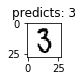

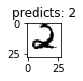

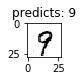

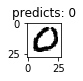

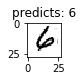

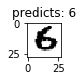

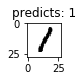

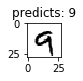

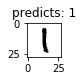

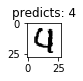

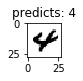

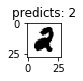

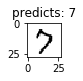

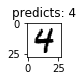

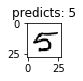

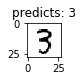

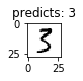

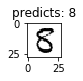

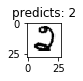

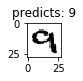

In [31]:
def plot_result(show_test_sample_size):
    orders = np.random.choice(len(test_data), show_test_sample_size)
    
    with tf.Session(graph=graph) as sess:
        ckpt = tf.train.get_checkpoint_state(LOG_DIR)
        saver.restore(sess, ckpt.model_checkpoint_path)
        
        predicted = sess.run(predicted_label, feed_dict={X:test_data[:,:-10], Y:test_data[:,-10:]})
    
    for i, n in enumerate(orders):
        data = test_data[n,:-10]
        target_label = test_data[n,-10:]
       
        pixels = data.reshape((28, 28))
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_subplot(show_test_sample_size, 1, i+1)
        ax.set_title("predicts: {}".format(predicted[n]))
        ax.imshow(pixels, cmap=plt.cm.binary)
    plt.show()
    
plot_result(20)

19번의 fine-training epoch를 돌린 이후 텐서보드 임베딩을 해보면 아래와 같다.


<img src="./imgs/ae_dnn_embedding2.png">

<br>
<img src="./imgs/ae_dnn_embedding.png">


10000개의 테스트 샘플을 잘 구분하고 있다.

<br>
<br>

그렇다면 일반 DNN에서는 어떨까?

14번의 epoch를 돌린 이후 임베딩 결과값은 아래와 같다.

<img src="./imgs/dnn_embedding.png">

꽤 잘 되었는데, 오히려 autoencoder 보다 잘 되었다고 볼 수도 있다. 사실 정확도도 0.98로 AE가 기록한 0.97보다 좋았다.

그렇다고 해서 AE가 필요없는 알고리즘이란 건 아니다. 인풋 데이터가 MNIST라는 아주 잘 정제되고 작은 데이터이기 때문에 DNN으로는 충분하다고 해석하는 편이 낫다. AE는 MNIST보다 훨씬 복잡한 데이터에서 잘 활용할 수 있을 듯 하다. VAE에 경우 크고 복잡한 데이터를 잘 다루는데, 이는 다음에 다루도록 하자.